## Import

In [94]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

## Exploring data

### Read cleaned data from file

In [95]:
video_df = pd.read_csv("../data/processed/video_data_processed.csv")
video_df.head(10)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
0,WkqM0ndr42c,Data School,My top 50 scikit-learn tips,If you already know the basics of scikit-learn...,python|data science|machine learning|scikit-learn,2023-04-20 14:56:43+00:00,8210,355,45,10051,hd,False,14,20,3,4,2023
1,tWFQqaRtSQA,Data School,21 more pandas tricks,You're about to learn 21 tricks that will help...,python|pandas|data analysis|data science,2022-05-12 16:20:41+00:00,43576,1379,67,1480,hd,False,16,12,3,5,2022
2,gd-TZut-oto,Data School,Adapt this pattern to solve many Machine Learn...,Here's a simple pattern that can be adapted to...,python|machine learning|scikit-learn|data science,2021-10-28 16:16:39+00:00,11707,435,16,469,hd,False,16,28,3,10,2021
3,v2QpvCJ1ar8,Data School,Tune multiple models simultaneously with GridS...,You can tune 2+ models using the same grid sea...,python|machine learning|scikit-learn|data science,2021-10-26 13:53:24+00:00,6453,198,14,307,hd,False,13,26,1,10,2021
4,sMlsd2CnIf4,Data School,Access part of a Pipeline using slicing,Want to operate on part of a Pipeline (instead...,python|machine learning|scikit-learn|data science,2021-10-21 14:49:56+00:00,2413,64,4,218,hd,False,14,21,3,10,2021
5,fvY3InlnOh8,Data School,Tune the parameters of a VotingClassifer or Vo...,Want to improve the accuracy of your VotingCla...,python|machine learning|scikit-learn|data science,2021-10-19 13:49:42+00:00,4053,141,9,247,hd,False,13,19,1,10,2021
6,2lq2k6J3GW4,Data School,Ensemble multiple models using VotingClassifer...,Want to improve your classifier's accuracy? Cr...,python|machine learning|scikit-learn|data science,2021-10-14 11:40:31+00:00,7261,243,18,272,hd,False,11,14,3,10,2021
7,unP3rCfzROk,Data School,Create feature interactions using PolynomialFe...,"Want to include ""feature interactions"" in your...",python|machine learning|scikit-learn|data science,2021-10-12 15:26:05+00:00,5290,127,9,248,hd,False,15,12,1,10,2021
8,QqFGKVieywY,Data School,Speed up GridSearchCV using parallel processing,Want your grid search to run faster? Set n_job...,python|machine learning|scikit-learn|data science,2021-10-07 13:19:28+00:00,4316,120,7,136,hd,False,13,7,3,10,2021
9,n_x40CdPZss,Data School,Use OrdinalEncoder instead of OneHotEncoder wi...,"With a tree-based model, try OrdinalEncoder in...",python|machine learning|scikit-learn|data science,2021-10-05 16:25:13+00:00,3855,130,14,419,hd,False,16,5,1,10,2021


In [96]:
video_df.shape

(60032, 17)

### **Question 3:**  Is there a particular time of the day, day of the week, or month when videos tend to get more views or engagement?

**Answering this question will:** by determining which times of the day, week, or month your video is most likely to attract the most viewers, you can optimize the time you air or publish your content. This increases the chances of your video being shown to a large audience and can generate positive engagement.

**How we answer this question:** we will use the columns `hour`, `day_of_week`, `month`, `viewCount`, `likeCount`, `commentCount`    

##### Preprocessing

In [97]:
interaction_df = video_df[['hour', 'day_of_week', 'month', 'viewCount', 'likeCount', 'commentCount']]

interaction_df['day_of_week'] = interaction_df['day_of_week'].apply(lambda x: calendar.day_name[x])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
interaction_df['day_of_week'] = pd.Categorical(interaction_df['day_of_week'], categories=day_order, ordered=True)

interaction_df['total_interaction'] = interaction_df['viewCount'] + interaction_df['likeCount'] + interaction_df['commentCount']
interaction_df['like_comment_total'] = interaction_df['likeCount'] + interaction_df['commentCount']
interaction_df['view_only'] = interaction_df['total_interaction'] - interaction_df['like_comment_total']

##### Step 1: Analysis of Views, Likes and Comments time of the day and day of the week

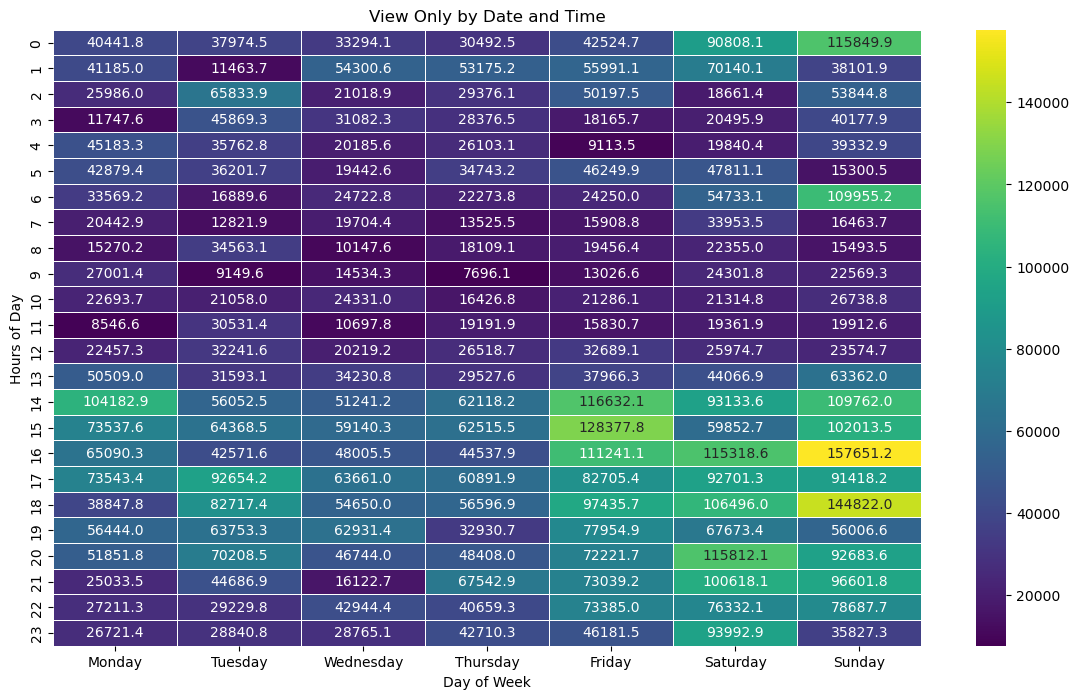

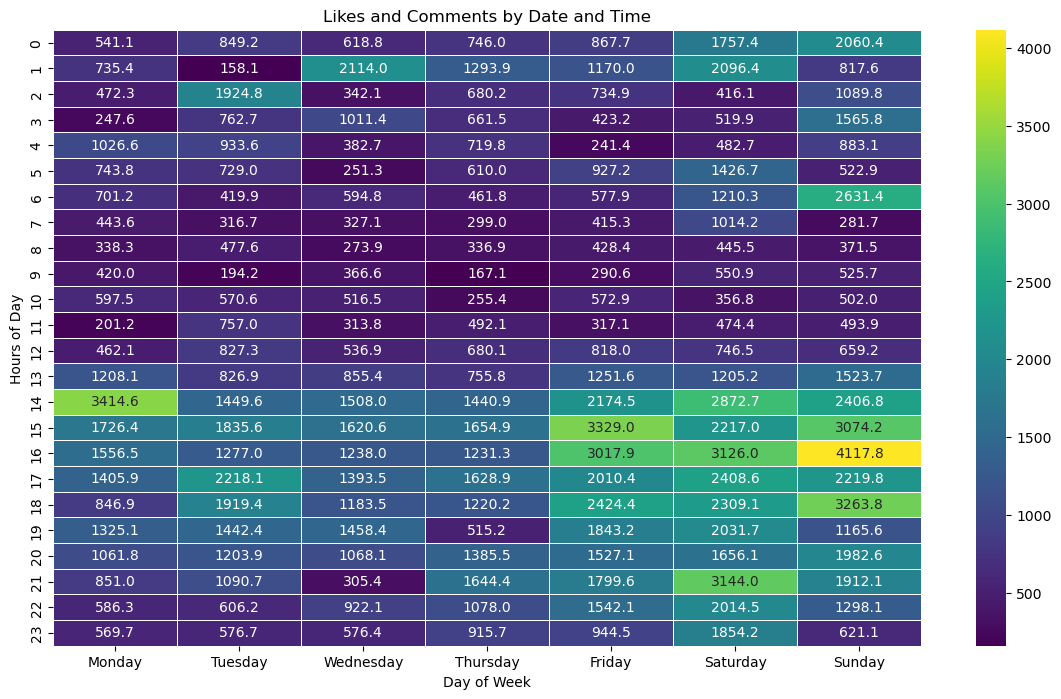

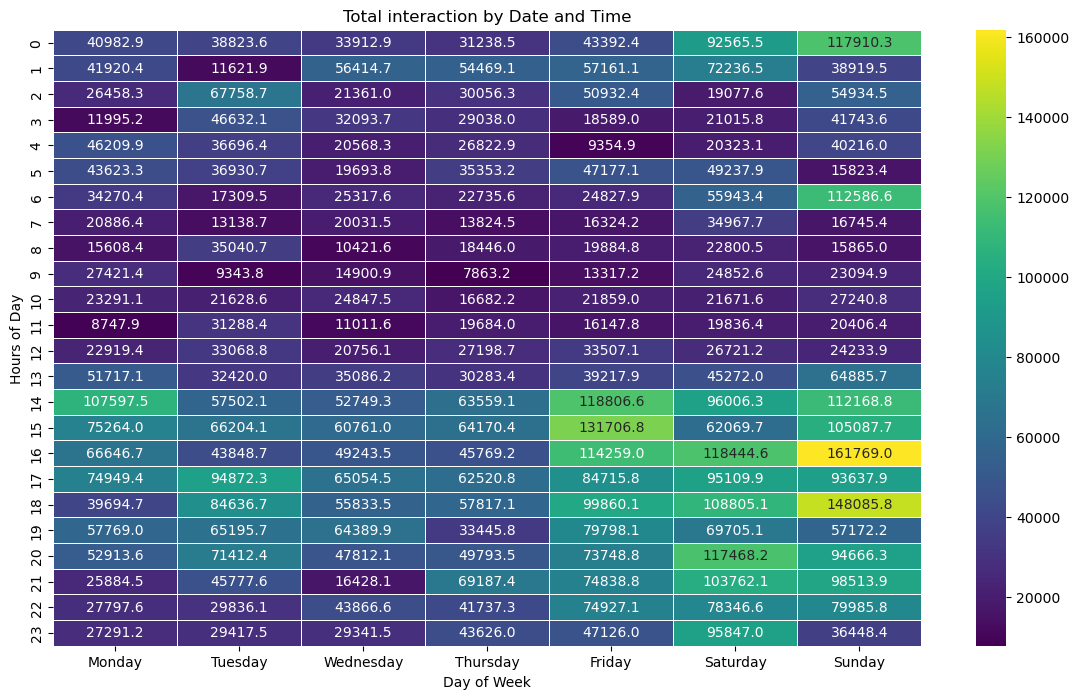

In [98]:

plt.figure(figsize=(14, 8))
view_only = interaction_df.pivot_table(index='hour', columns='day_of_week', values='view_only', aggfunc='mean')
sns.heatmap(view_only, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('View Only by Date and Time')
plt.xlabel('Day of Week')
plt.ylabel('Hours of Day')
plt.show()

plt.figure(figsize=(14, 8))
like_comment_total = interaction_df.pivot_table(index='hour', columns='day_of_week', values='like_comment_total', aggfunc='mean')
sns.heatmap(like_comment_total, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Likes and Comments by Date and Time')
plt.xlabel('Day of Week')
plt.ylabel('Hours of Day')
plt.show()

plt.figure(figsize=(14, 8))
total_interaction_total = interaction_df.pivot_table(index='hour', columns='day_of_week', values='total_interaction', aggfunc='mean')
sns.heatmap(total_interaction_total, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Total interaction by Date and Time')
plt.xlabel('Day of Week')
plt.ylabel('Hours of Day')
plt.show()

##### Step 2: Analysis of Views, Likes and Comments by Month

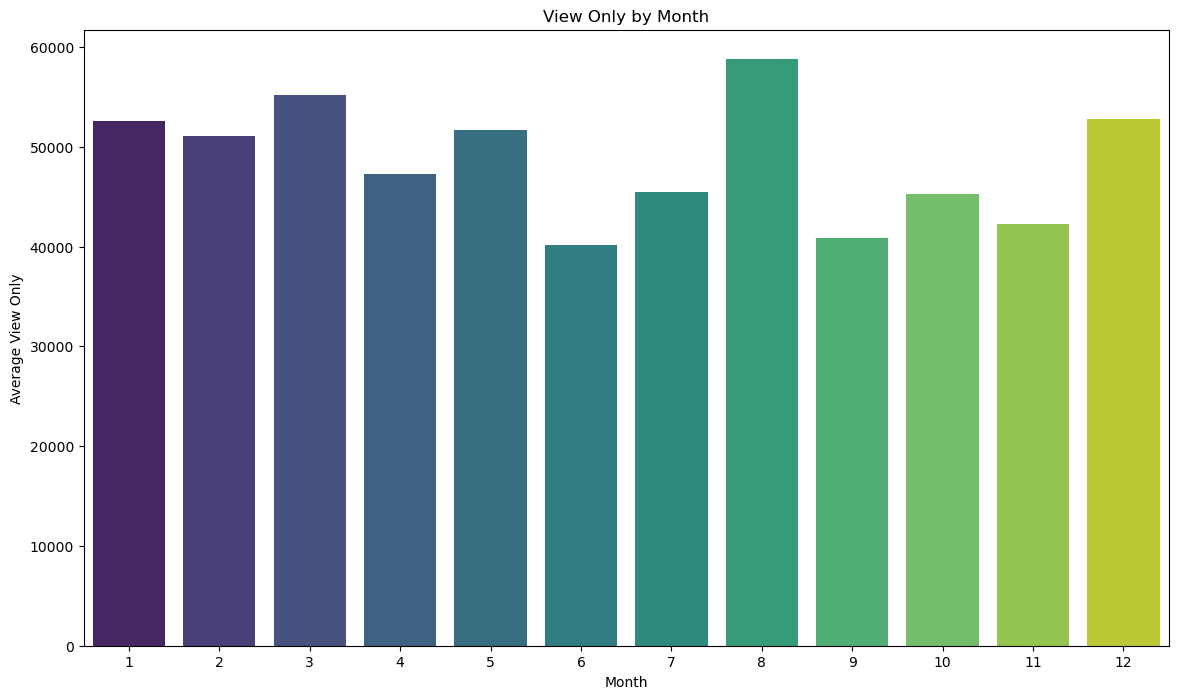

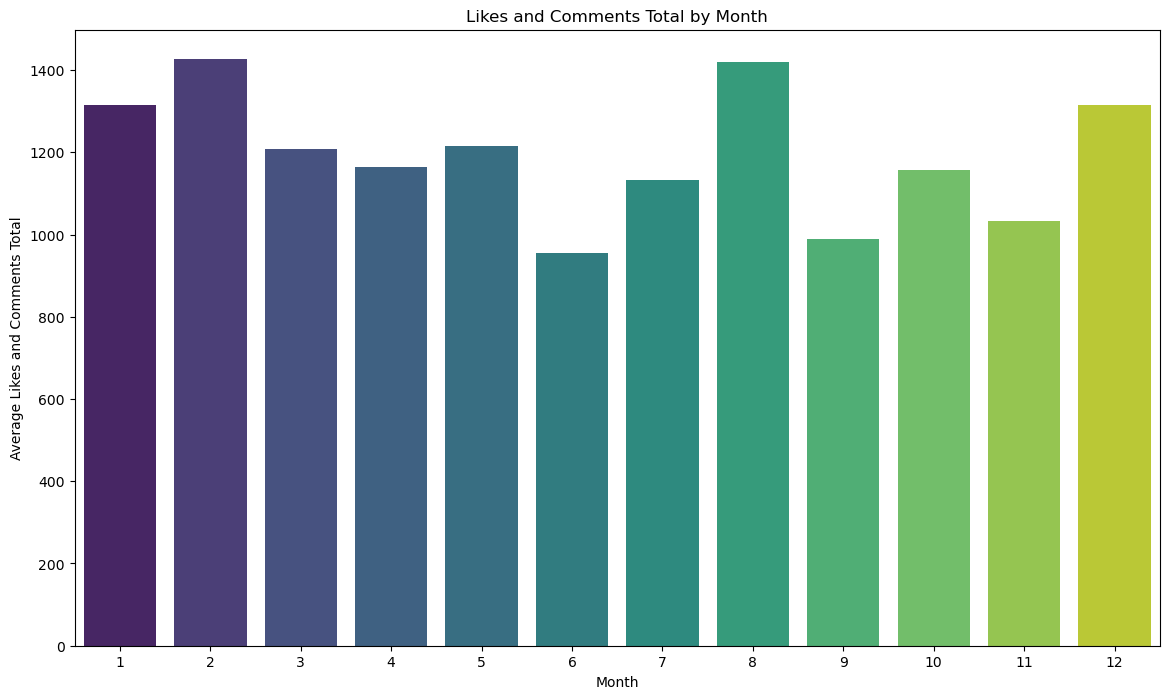

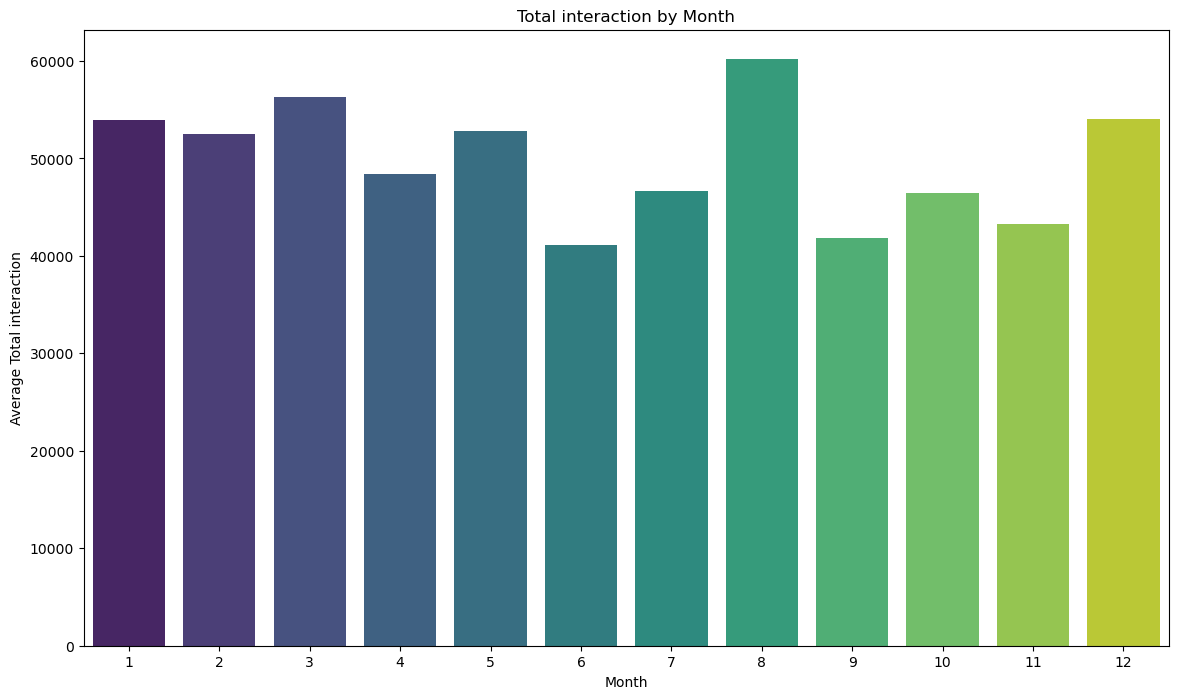

In [99]:

plt.figure(figsize=(14, 8))
view_only_month = interaction_df.pivot_table(index='month', values='view_only', aggfunc='mean')
sns.barplot(x=view_only_month.index, y='view_only', data=view_only_month, palette='viridis')
plt.title('View Only by Month')
plt.xlabel('Month')
plt.ylabel('Average View Only')
plt.show()

plt.figure(figsize=(14, 8))
like_comment_total_month = interaction_df.pivot_table(index='month', values='like_comment_total', aggfunc='mean')
sns.barplot(x=like_comment_total_month.index, y='like_comment_total', data=like_comment_total_month, palette='viridis')
plt.title('Likes and Comments Total by Month')
plt.xlabel('Month')
plt.ylabel('Average Likes and Comments Total')
plt.show()

plt.figure(figsize=(14, 8))
total_interaction_total_month = interaction_df.pivot_table(index='month', values='total_interaction', aggfunc='mean')
sns.barplot(x=total_interaction_total_month.index, y='total_interaction', data=total_interaction_total_month, palette='viridis')
plt.title('Total interaction by Month')
plt.xlabel('Month')
plt.ylabel('Average Total interaction')
plt.show()

### **Question 4:** How does caption affect views and interactions (likes, comments)?

**Answering this question will:** provides insights into how captions can impact video performance on the platform.

**How we answer this question:** we will use the columns `viewCount`, `likeCount`, `commentCount`, `caption` to calculate the correlation matrix

##### Step 1: Calculate the correlation matrix

In [101]:
correlation_matrix = video_df[['viewCount', 'likeCount', 'commentCount', 'caption']].corr()
correlation_matrix

,viewCount,likeCount,commentCount,caption
viewCount,1.000000,0.869915,0.723999,0.117834
likeCount,0.869915,1.000000,0.700103,0.128734
commentCount,0.723999,0.700103,1.000000,0.105745
caption,0.117834,0.128734,0.105745,1.000000


##### Step 2: Display the correlation matrix using a HeatMap chart

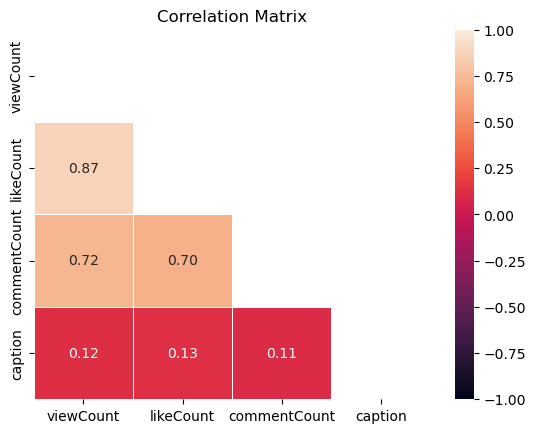

In [102]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- `viewCount` and `caption`: The correlation coefficient is 0.12, which found a very low degree of compatibility between captions and views. Captions have no effect on views.
- `likeCount` and `caption`: The correlation coefficient is 0.13, similar to views, captions do not have a large impact on likes.
- `commentCount` and `caption`: The correlation coefficient is 0.105745, a low correlation level, showing that caption do not affect the number of comments much.
- Overall, it seems like captions don't have as much of an impact on views and engagement compared to other factors like likes and comments.